In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
from scipy.stats import chi2, norm

1. Сделать имитатор бросания 2 костей (20 000 бросков)

In [2]:
sample = pd.DataFrame({'one':np.random.choice([1,2,3,4,5,6], 20000), 'two':np.random.choice([1,2,3,4,5,6], 20000)})
sample

,one,two
0,2,5
1,1,1
2,6,5
3,6,3
4,3,5
...,...,...
19995,1,4
19996,6,4
19997,1,1
19998,1,1


2. Проверить вероятности выпадения цифр на каждой кости


In [3]:
from collections import Counter
c1 = Counter(sample['one'])
c2 = Counter(sample['two'])

print("Число выпадений цифр на каждой кости:")   
print(c1)
print(c2)



Число выпадений цифр на каждой кости:
Counter({1: 3444, 6: 3342, 5: 3338, 4: 3312, 2: 3308, 3: 3256})
Counter({6: 3472, 5: 3417, 1: 3355, 3: 3284, 4: 3261, 2: 3211})


3. Построить гистограмму выпадения сумм цифр на костях

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0.5, 0, 'sum')

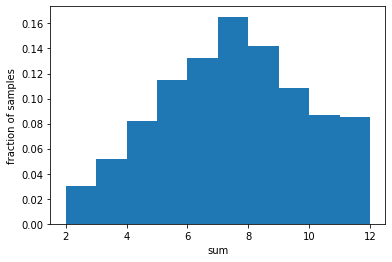

In [4]:
sum = sample['one'] + sample['two']
plt.hist(sum , normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('sum')



4. Сделать 10 000 серий бросков. В каждой серии определить количество бросков до выпадения суммы на костях числа 9


In [5]:
sample_2 = pd.DataFrame({'one':np.random.choice([1,2,3,4,5,6], 10000), 'two':np.random.choice([1,2,3,4,5,6], 10000)})
sum_2 = sample_2['one'] + sample_2['two']
sum9 = np.where(sum_2 == 9)
sum9
sum_9=pd.DataFrame(sum9)
sum_9
#вывели когда выпадает сумма 9

,0,1,2,3,4,5,6,7,8,9,...,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099
0,8,10,12,13,35,38,46,50,54,56,...,9901,9902,9929,9940,9944,9960,9961,9966,9971,9976


In [6]:
sum_9.apply(lambda x: x[2] - x[1], axis = 1)
#думаю как запустить в цикле

0    2
dtype: int64

In [7]:
nine = pd.DataFrame()
summ9= []
for i in range(10000):
    k=0
    while True:
        x = (np.random.choice([1,2,3,4,5,6]))
        y = (np.random.choice([1,2,3,4,5,6]))
        k+=1
        if (x + y == 9):
            break;
    summ9.append(k)
nine['summ9'] = summ9

    

5. Визуализировать результат


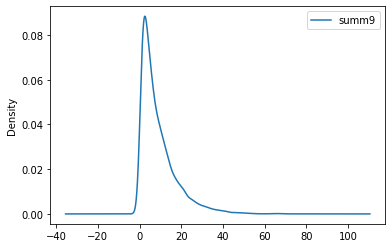

In [8]:
nine.plot(kind='density')


6. Сгенерировать последовательность случайных чисел в диапазоне от 0 до 12, с нормальным распределением


In [9]:
h =np.arange(0,13)
mu = np.std(h)
sigma = np.mean(h)
mu = 6.0
sigma = 3.7416573867739413

norm_rv = sts.norm(loc=mu, scale=sigma)
y = norm_rv.rvs(size=50)
y

array([ 9.21280591, 10.62724365,  9.61978104,  4.76267257, 13.58016744,
        1.61668827,  8.64686027,  3.82831095,  6.73914272,  3.13432991,
        7.94965427,  1.17810065,  5.61002073,  7.86202382,  7.00269468,
        5.49733093, 10.92951078,  6.37486887,  5.90981421, 12.2867804 ,
       11.72791031,  5.81850962,  6.65223818, 11.17424453,  1.32988725,
        3.21723917,  8.90401199,  5.99035394, 10.36743767,  3.11809846,
        7.10747084,  8.40761046,  2.5841287 ,  9.21117442,  5.99857723,
        4.41802773,  6.5178172 ,  4.66381821,  9.14536411,  3.43195392,
        1.68811373, 12.74707758, 12.55056983,  6.75288243, 11.2092377 ,
        4.84583828, 11.04984454,  8.23589292,  6.03777756,  3.3785726 ])

7. Визуализировать результат


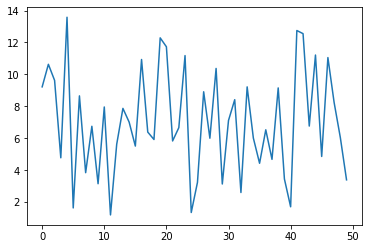

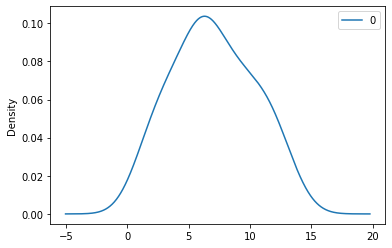

In [10]:
plt.plot(y)
pd.DataFrame(y).plot(kind='density') 

8. Сгенерировать 2 случайные последовательности. Получить из них третью, каждый элемент которой - сумма соответствующих элементов первых двух последовательностей


In [11]:
sequence = pd.DataFrame({"seq1": np.random.random(50), "seq2": np.random.random(50)})
sequence
seq_sum=sequence.apply(func='sum', axis = 1).head()
seq_sum


0    1.077173
1    1.445831
2    0.574665
3    0.776959
4    1.132106
dtype: float64

9. Визуализировать результат


Text(0.5, 0, 'sum')

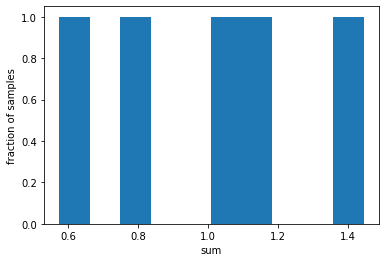

In [12]:
plt.hist(seq_sum)
plt.ylabel('fraction of samples')
plt.xlabel('sum')



10. Проверить, что полученное распределение соответствует нормальному распределению


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


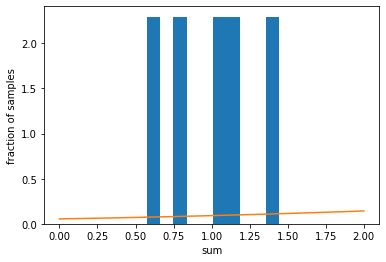

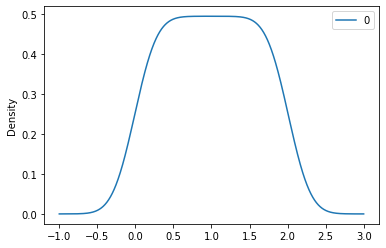

In [13]:
plt.hist(seq_sum, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('sum')

x = np.linspace(0,2,100)
cdf = norm_rv.cdf(x) 
plt.plot(x, cdf)
pd.DataFrame(x).plot(kind='density') 

11. Из двух предыдущих последовательностей получить четвертую, каждый элемент которой равен отношению соответствующих элементов из первой последовательности к элементу второй последовательности


In [14]:
seq_del=sequence['seq1']/sequence['seq2']
seq_del.head()

0     2.745029
1     0.461788
2    14.490261
3    10.798615
4     2.476560
dtype: float64

12. Визуализировать результат

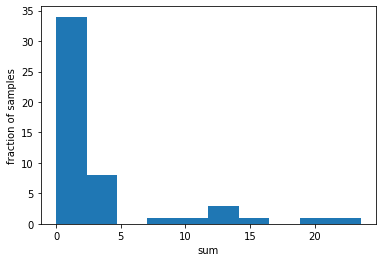

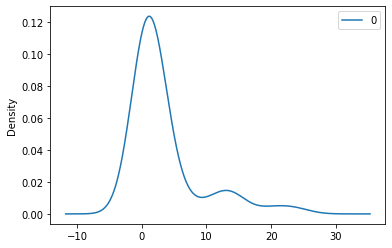

In [15]:
plt.hist(seq_del)
plt.ylabel('fraction of samples')
plt.xlabel('sum')

pd.DataFrame(seq_del).plot(kind='density') 


13. Проверить подчиняется ли полученная последовательность нормальному распределению.


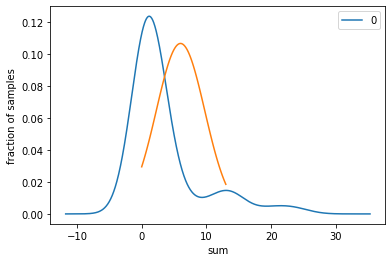

In [16]:
pd.DataFrame(seq_del).plot(kind='density') 
plt.ylabel('fraction of samples')
plt.xlabel('sum')

x = np.linspace(0,13,100)
cdf = norm_rv.cdf(x)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf')

14. Сгенерировать две новые случайные последовательности с разным RandomState.


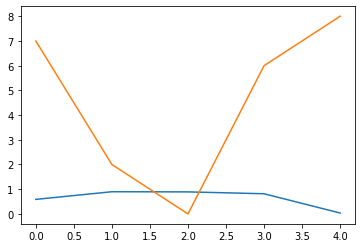

In [17]:
rng = np.random.RandomState(20)
r1 = rng.rand(5)
r2 = rng.randint(0, 10, 5)
plt.plot(r1, label='r1')
plt.plot(r2, label='r2')

16. Проверить корреляцию этих двух последовательностей.


In [18]:
np.corrcoef(r1,r2)


array([[ 1.        , -0.75300666],
       [-0.75300666,  1.        ]])